In [5]:
import pandas as pd

In [6]:
df_datos=pd.read_excel('Input.xlsx')
pd.options.display.float_format = '{:,.2f}'.format

df_datos_fi=df_datos['Variable_elegida']
df_datos_fi



0       8,335,453.66
1       3,072,983.71
4       5,750,000.01
5         500,000.00
9       1,257,891.07
12        132,955.13
16      3,961,424.24
17        178,980.77
21     10,049,006.31
24      7,904,556.15
25      1,896,500.00
29        716,557.48
33      3,028,846.81
36    147,781,793.05
37      2,976,397.56
40     19,252,574.16
41      3,716,472.69
42         75,399.99
43         18,907.20
44      2,228,724.16
48         22,322.16
52     32,661,678.99
53             90.01
56      3,780,692.98
57        355,564.92
58     15,483,596.61
62     16,930,667.14
64      1,794,557.23
65             45.61
66        548,081.17
70      5,573,882.41
71         29,787.78
72      2,317,588.10
76     53,956,418.78
77        405,365.91
78     14,248,109.48
82     91,324,050.71
83      2,289,350.87
84     21,786,290.44
88     91,727,643.03
89      1,269,034.50
90     30,642,940.06
94     50,791,408.76
95        726,484.84
96     21,423,909.49
106       117,000.00
110       198,000.00
Name: CF_LIC_

Distribución Benford: [0.16666666666666666, 0.08333333333333333, 0.08333333333333333, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]


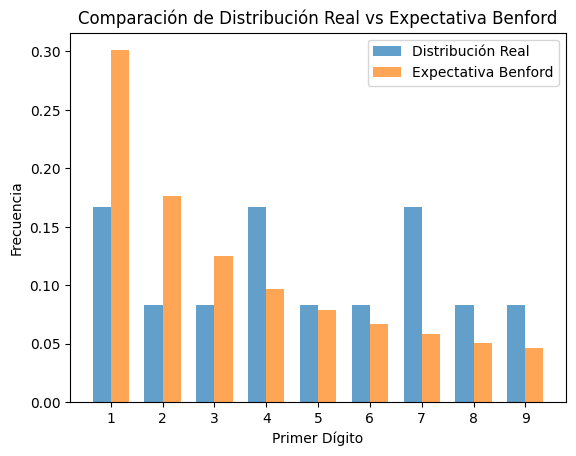

In [14]:
import matplotlib.pyplot as plt

def calculate_benford_distribution(df_datos_fi):
    distribution = [0] * 9
    for value in df_datos_fi:
        if value != 0:
            first_digit = int(str(value)[0])
            if first_digit != 0 and first_digit <= 9:
                distribution[first_digit - 1] += 1
    total = sum(distribution)
    benford_distribution = [count / total for count in distribution]
    return benford_distribution

# Example data
df_datos_fi = [123, 456, 789, 101, 202, 303, 404, 505, 606, 707, 808, 909]

benford_distribution = calculate_benford_distribution(df_datos_fi)
print("Distribución Benford:", benford_distribution)

# Expected distribution according to Benford's Law (approximately):
benford_expected_distribution = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

# Plotting
positions = range(1, 9 + 1)
bar_width = 0.35
plt.bar(positions, benford_distribution, width=bar_width, label='Distribución Real', alpha=0.7)
plt.bar([p + bar_width for p in positions], benford_expected_distribution, width=bar_width, label='Expectativa Benford', alpha=0.7)

plt.xlabel('Primer Dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribución Real vs Expectativa Benford')
plt.xticks([p + bar_width / 2 for p in positions], ['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend()
plt.show()
